In [28]:
import cv2
import matplotlib.pyplot as plt

In [29]:
image_path = "car_plate/day_00057.jpg"
label_path = "car_plate_yolo_labels/day_00057.txt"

image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

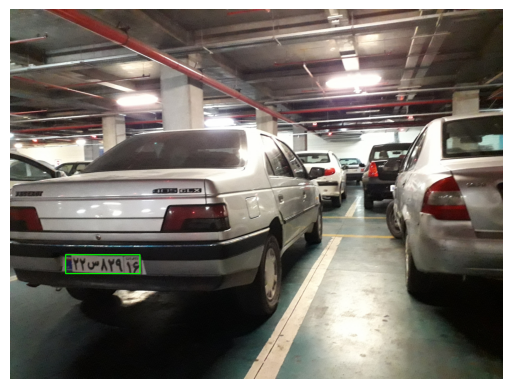

In [30]:
try:
    with open(label_path, "r") as f:
        labels = f.readlines()
except FileNotFoundError:
    print("not found")
    exit()

for label in labels:
    parts = label.strip().split()
    if len(parts) == 5:
        class_id = int(parts[0])  
        x_center = float(parts[1]) * img_width
        y_center = float(parts[2]) * img_height
        bbox_width = float(parts[3]) * img_width
        bbox_height = float(parts[4]) * img_height

        x_min = int(x_center - bbox_width / 2)
        y_min = int(y_center - bbox_height / 2)
        x_max = int(x_center + bbox_width / 2)
        y_max = int(y_center + bbox_height / 2)

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
